In [1]:
from dbo.simulator.TestFunctions import *
from dbo.acquisition.DEI import DiverseExpectedImprovement
from dbo.acquisition.Wrappers import (EIWrapper, DEIWrapper, KGWrapper)
from dbo.tester.Tester import *
from dbo.metrics.ExperimentMetric import *
from botorch.acquisition import ExpectedImprovement
from dbo.plotter.Plotter import *

/Users/bennysun/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test = Tester(5, 20, 10)

simulator_2d_list = [Branin2DSimulator(), Griewank2DSimulator(), 
                  SixHumpCamel2DSimulator(), HolderTable2DSimulator(),  Gramacy2DSimulator()]

acquisition_list = [DEIWrapper(lambda_ = 1, epsilon = 0.1), EIWrapper(), KGWrapper(num_fantasy = 2)]

experiment_2d_list = test.perform_known_experiment(1, simulator_2d_list, acquisition_list)

In [5]:
experiment_metric = ExperimentMetrics()
df_2d = experiment_metric.get_dataframe(experiment_2d_list, 0.4)
df_2d.to_pickle("./results/df_2d.pkl")
df_2d

,sim,acqf,num_sol,curr_max,avg_dist,num_cluster,trial
0,Branin2DSimulator,DEIWrapper,0,-11.777725,0.000000,1,1
1,Branin2DSimulator,EIWrapper,23,-0.402086,3.326245,2,1
2,Branin2DSimulator,KGWrapper,3,-0.423233,0.077049,1,1
3,Griewank2DSimulator,DEIWrapper,0,-0.432761,0.000000,1,1
4,Griewank2DSimulator,EIWrapper,35,-0.000672,4.600506,4,1
5,Griewank2DSimulator,KGWrapper,11,-0.000988,6.195367,4,1
6,SixHumpCamel2DSimulator,DEIWrapper,0,-0.596863,0.000000,1,1
7,SixHumpCamel2DSimulator,EIWrapper,1,0.662271,0.000000,1,1
8,SixHumpCamel2DSimulator,KGWrapper,6,1.003265,0.927496,2,1
9,HolderTable2DSimulator,DEIWrapper,2,16.248404,19.083582,1,1


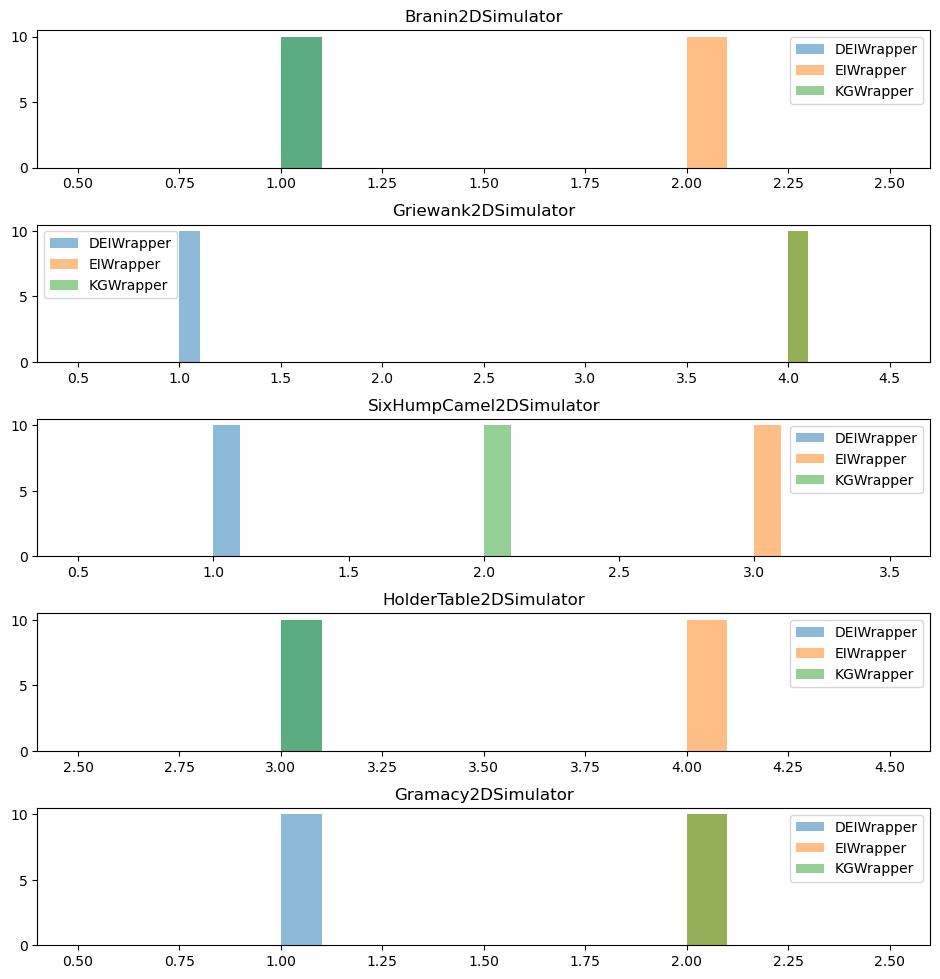

In [7]:
plotter_2d = Plotter(experiment_2d_list, 0.8)
plotter_2d.plot_feature('num_cluster')

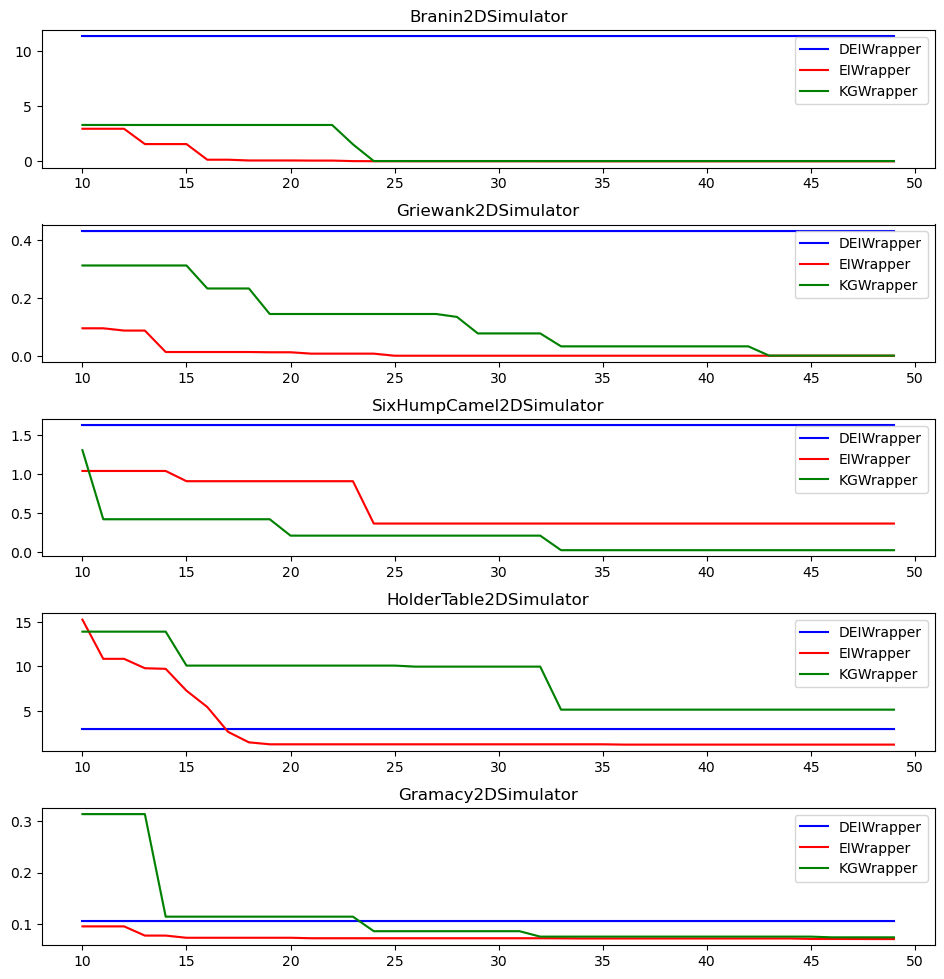

In [8]:
plotter_2d.plot_opt_gap(10)

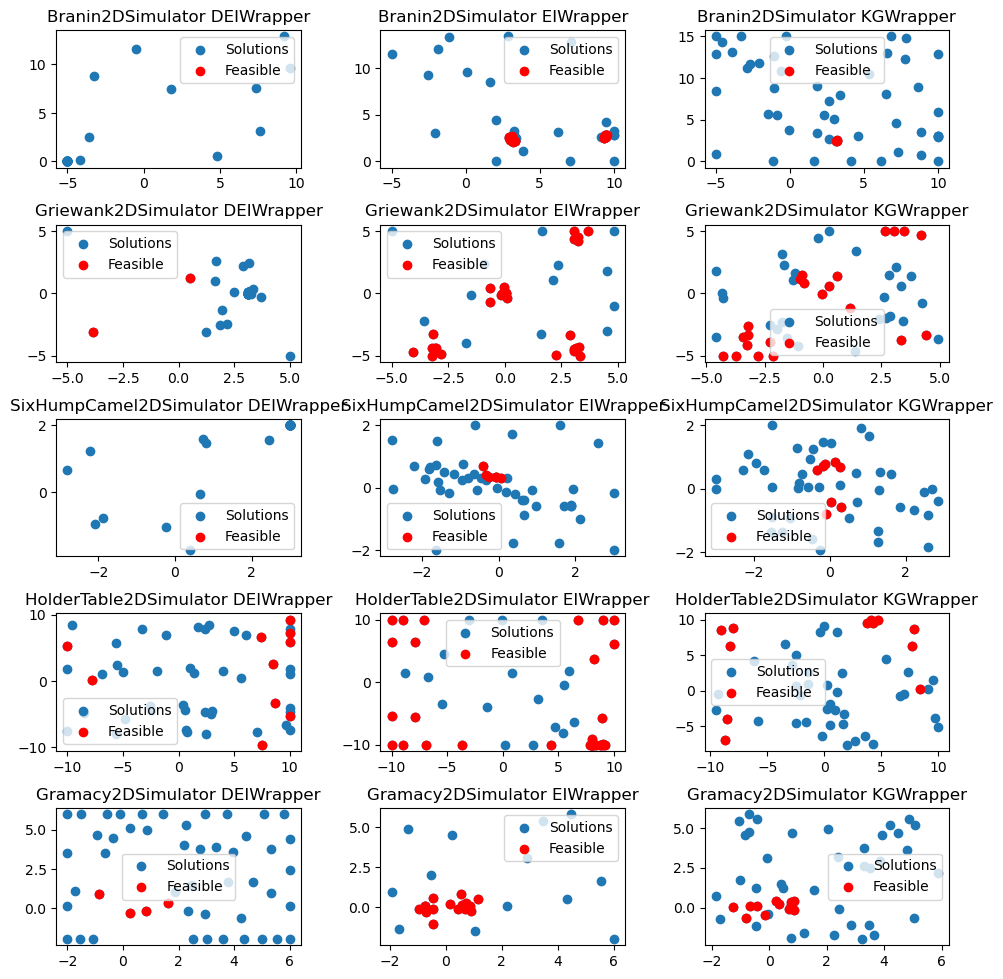

In [9]:
plotter_2d.plot_scatter_2d(1)

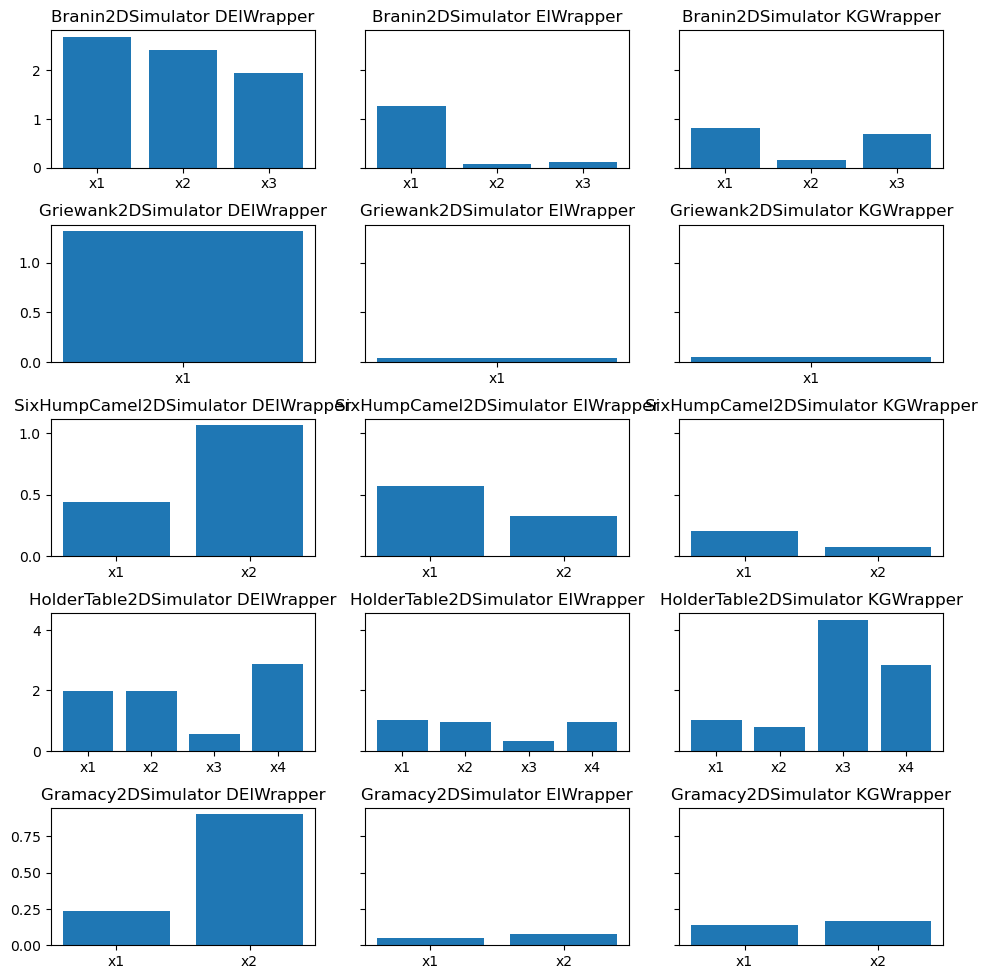

In [10]:
minima_2d = {
    'Branin2DSimulator':[np.array([-3.14, 12.275]), np.array([3.14, 2.275]), np.array([9.42, 2.475])],
    'SixHumpCamel2DSimulator':[np.array([0.09, -0.71]), np.array([-0.09, 0.71])],
    'Griewank2DSimulator':[np.array([0, 0])],
    'Gramacy2DSimulator':[np.array([0.8, 0]), np.array([-0.8, 0])],
    'HolderTable2DSimulator':[np.array([8.05, 9.66]), np.array([-8.05, 9.66]), np.array([8.05, -9.66]), np.array([-8.05, -9.66])]
}

plotter_2d.plot_local_minima(minima_2d)

In [9]:
def count_subsets(numbers, k, target_sum):
    n = len(numbers)
    dp = [[0] * (target_sum + 1) for _ in range(k + 1)]
    dp[0][0] = 1

    for num in numbers:
        for i in range(k, 0, -1):
            for j in range(target_sum, num - 1, -1):
                dp[i][j] += dp[i - 1][j - num]

    return dp[k][target_sum]

In [54]:
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13] * 4
target_sum = 18
k = 10
count_subsets(numbers, k, target_sum)

6

In [59]:
total_num = 0
num_dict = {}
strike = 70
for target_sum in range(40, 100):
    k = 10
    total = count_subsets(numbers, 10, target_sum)
    num_dict[target_sum] = total
    total_num += total

mean_call = 0
mean_put = 0

for num in num_dict:
    if num <= strike:
        continue
    
    mean_call += (num - strike) * (num_dict[num])/total_num

for num in num_dict:
    if num >= strike:
        continue
    
    mean_put += (strike - num) * (num_dict[num])/total_num

print(mean_call)
print(mean_put)

25.000186262731425
0.00018626273142531674


In [58]:
def count_subsets(numbers, k, target_sum):
    n = len(numbers)
    dp = [[0] * (target_sum + 1) for _ in range(k + 1)]
    dp[0][0] = 1

    for i in range(1, k + 1):
        for j in range(1, target_sum + 1):
            dp[i][j] = dp[i][j - 1] + (dp[i - 1][j - numbers[i - 1]] if j >= numbers[i - 1] else 0)

    return dp[k][target_sum]